In [64]:
import os
import pandas as pd
import numpy as np
import itk
import SimpleITK as sitk
import matplotlib.pyplot as plt
import ants


In [31]:
cn_dict_with_images = np.load("data/cn_dict_with_images.npy",allow_pickle='TRUE').item()
ad_dict_with_images = np.load("data/ad_dict_with_images.npy",allow_pickle='TRUE').item()
smci_dict_with_images = np.load("data/smci_dict_with_images.npy",allow_pickle='TRUE').item()
pmci_dict_with_images = np.load("data/pmci_dict_with_images.npy",allow_pickle='TRUE').item()

In [48]:
example_path = '/Volumes/Extreme SSD/ADNI/002_S_0295/MP-RAGE/2006-04-18_08_20_30.0/I13722'

example_image = itk.imread(example_path)

**Borrowed the following code from Lucas**

In [49]:
def show_slices(slices,img):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    fig.set_size_inches(11,8)
    for i, slice in enumerate(slices):

        axes[i].imshow(slice.T, cmap="gray", origin="lower")
    plt.suptitle(f"Center slices for current MRI image \n Image size: {img.shape}",fontsize=20)
    # print("image size:",img.shape)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.20)
    plt.show()

def show_brain_center_slice(img: np.memmap):
    slice_0 = img[int(img.shape[0]/2), :, :]
    slice_1 = img[:, int(img.shape[1]/2), :]
    slice_2 = img[:, :, int(img.shape[2]/2)]
    show_slices([slice_0, slice_1, slice_2],img)

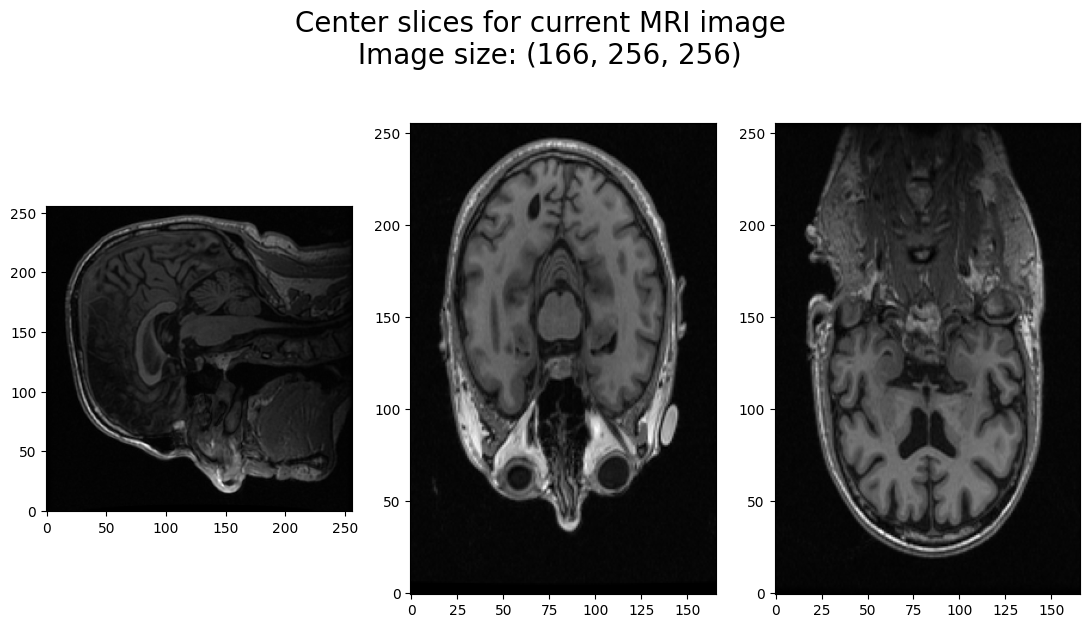

In [50]:
show_brain_center_slice(example_image)

In [52]:
corrected_image = itk.N4BiasFieldCorrectionImageFilter(example_image)

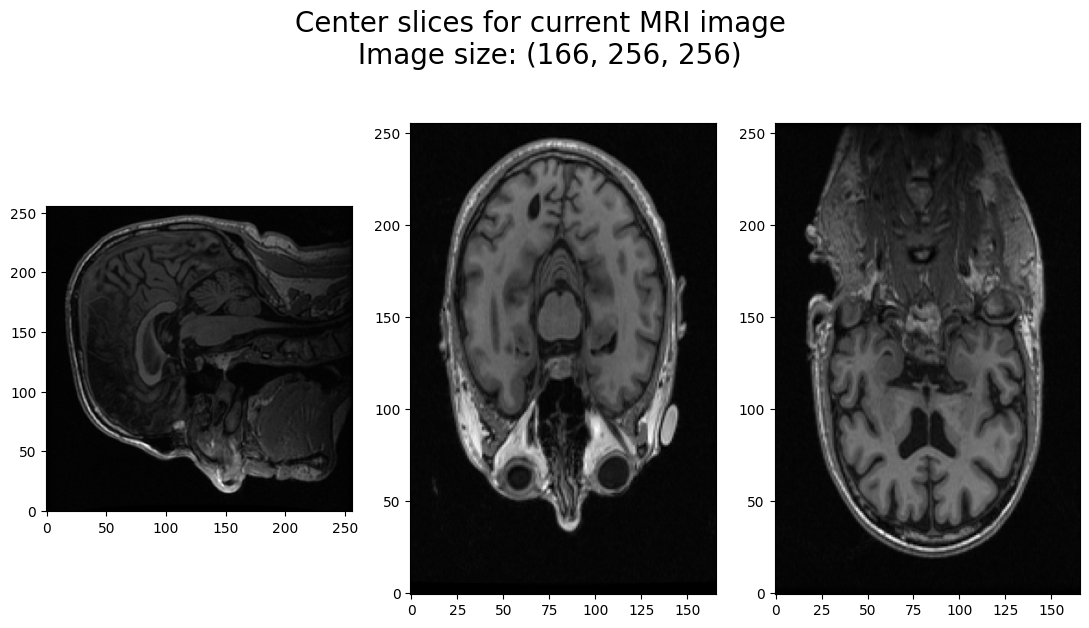

In [53]:
show_brain_center_slice(corrected_image)

In [66]:
fi = ants.image_read(ants.get_ants_data('r16'))
mi = ants.image_read(ants.get_ants_data('r64'))
fi = ants.resample_image(fi, (60,60), 1, 0)
mi = ants.resample_image(mi, (60,60), 1, 0)

mytx = ants.registration(fixed=fi, moving=mi, type_of_transform = 'SyN' )


AttributeError: module 'ants' has no attribute 'image_read'